In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# Load the dataset
data = pd.read_csv('data.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gas       308 non-null    int64
 1   CO        308 non-null    int64
 2   hydrogen  308 non-null    int64
 3   class     308 non-null    int64
dtypes: int64(4)
memory usage: 9.8 KB


In [19]:
features = ['gas','CO','hydrogen']
# Separating out the features
data_features = data[features]
data_corr = data_features.corr()
data_corr

,gas,CO,hydrogen
gas,1.000000,-0.051556,0.515683
CO,-0.051556,1.000000,0.284142
hydrogen,0.515683,0.284142,1.000000


In [20]:
data_features.head()

,gas,CO,hydrogen
0,211,148,336
1,208,146,334
2,208,147,335
3,208,147,335
4,207,147,334


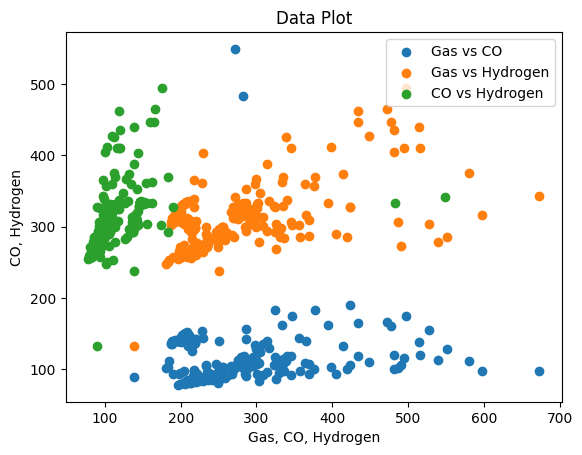

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['gas'], data['CO'], label='Gas vs CO')
plt.scatter(data['gas'], data['hydrogen'], label='Gas vs Hydrogen')
plt.scatter(data['CO'], data['hydrogen'], label='CO vs Hydrogen')
plt.xlabel('Gas, CO, Hydrogen')
plt.ylabel('CO, Hydrogen')
plt.title('Data Plot')
plt.legend()
plt.show()



In [22]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()
# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the data
kmeans.fit(data_scaled[features])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataset
data_scaled['cluster'] = labels

# Print the resulting clusters
print(data_scaled['cluster'].value_counts())

cluster
1    271
0     37
Name: count, dtype: int64


c:\Users\Rico\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


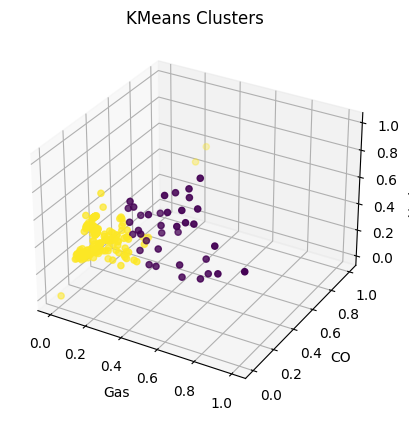

In [23]:
import matplotlib.pyplot as plt

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_scaled['gas'], data_scaled['CO'], data_scaled['hydrogen'], c=data_scaled['cluster'], cmap='viridis')
ax.set_xlabel('Gas')
ax.set_ylabel('CO')
ax.set_zlabel('Hydrogen')
ax.set_title('KMeans Clusters')

plt.show()